<img src='img/Screen Shot 2021-10-28 at 12.19.37 AM.png'>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/ToothGrowth.csv'
df = pd.read_csv(url, usecols=[1,2,3])
df

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


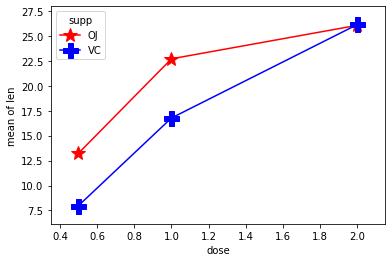

In [3]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(
    df.dose, df.supp, df.len,
    colors=['red','blue'], markers=['*','P'], markersize=15
)

$$\begin{array}{cccccc}
\mbox{Task}&&\mbox{One Way ANOVA}&&\mbox{Two Way ANOVA}\\\hline
\mbox{Difference between OJ and VC?}&&\mbox{Yes}&&\mbox{Yes}\\
\mbox{Difference among DOSE?}&&\mbox{Yes (Done Separatly)}&&\mbox{Yes}\\
\mbox{Interaction between two factors?}&&\text{No}&&\mbox{Yes}\\\hline
\end{array}$$

<img src='img/Screen Shot 2021-10-25 at 11.22.58 PM.png' width=50%>
<img src='img/Screen Shot 2021-10-25 at 11.23.37 PM.png' width=50%>
<img src='img/Screen Shot 2021-10-25 at 11.24.22 PM.png' width=50%>

# Condition for Interaction Test
<img src='img/Screen Shot 2021-10-25 at 11.25.36 PM.png' width=30%>

[SPSS 이원 분산분석 방법 / two-way anova / 상호작용효과(interaction effect) / 주효과(main effect) / 논문쓰는남자 / 논쓰남](https://www.youtube.com/watch?v=i4NHIGvTB-g)

$$\begin{array}{cccccccc}
&&\text{Linear Regression}&&\text{One Way ANOVA}\\
\text{Model}&&y=\alpha+\beta x
&&
y=\alpha+\sum_{i=1}^{c}\beta_i 1_{x\in C_i}
\\
\text{H}_0&&\beta=0
&&
\quad\beta_1=\cdots=\beta_c\\
\end{array}$$

$$\begin{array}{ccc}
&&\text{Linear Regression}&&\text{Two Way ANOVA}\\
\text{Model}&&y=\alpha+\beta_1 x_1+\beta_2 x_2 + \gamma x_1x_2
&&
y=\alpha+\sum_{i=1}^{c^{(1)}}\beta^{(1)}_i 1_{C^{(1)}_i}
+\sum_{j=1}^{c^{(2)}}\beta^{(2)}_j 1_{C^{(2)}_j}
+\sum_{i=1}^{c^{(1)}}\sum_{j=1}^{c^{(2)}}\beta_{i,j} 1_{C^{(1)}_iC^{(2)}_j}\\
\text{H}_0&&\beta_1=0
&&\quad\beta^{(1)}_1=\cdots=\beta^{(1)}_{c^{(1)}}\\
\text{H}_0&&\beta_2=0
&&\quad\beta^{(2)}_1=\cdots=\beta^{(2)}_{c^{(2)}}\\
\text{H}_0&&\gamma=0&&\quad\beta_{1,1}=\cdots=\beta_{c^{(1)},c^{(2)}}\\
\end{array}$$

In [4]:
from statsmodels.formula.api import ols
# the "C" indicates categorical data
model = ols('len ~ C(supp) + C(dose) + C(supp):C(dose)', df).fit()

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     41.56
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.50e-17
Time:                        13:40:38   Log-Likelihood:                -159.35
No. Observations:                  60   AIC:                             330.7
Df Residuals:                      54   BIC:                             343.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       13.2300      1.148     11.521      0.000      10.928      15.532
C(supp)[T.VC]                   -5.2500      1.624     -3.233      0.002      -8.506      -1.994
C(dose)[T.1.0]                   9.4700      1.624      5.831      0.000       6.214      12.726
C(dose)[T.2.0]                  12.8300      1.624      7.900      0.000       9.574      16.086
C(supp)[T.VC]:C(dose)[T.1.0]    -0.6800      2.297     -0.296      0.768      -5.285       3.925
C(supp)[T.VC]:C(dose)[T.2.0]     5.3300      2.297      2.321      0.024       0.725       9.935
==============================================================================
Omnibus:                        0.336   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.324
Skew:                           0.164   Prob(JB):                        0.850
Kurtosis:                       2.852   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
from statsmodels.stats.anova import anova_lm
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(supp),1.0,205.350000,205.350000,15.571979,2.311828e-04
C(dose),2.0,2426.434333,1213.217167,91.999965,4.046291e-18
C(supp):C(dose),2.0,108.319000,54.159500,4.106991,2.186027e-02
Residual,54.0,712.106000,13.187148,NaN,NaN


# Reference

Erik_Marsja [youtube](https://www.youtube.com/watch?time_continue=146&v=Lp2aV_4LF48) [blog](https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/)

[wiki](https://en.wikipedia.org/wiki/Two-way_analysis_of_variance)

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

[statisticsfun](https://www.youtube.com/playlist?list=PLWtoq-EhUJe2TjJYfZUQtuq7a0dQCnOWp)

[SPSS 이원 분산분석 방법 / two-way anova / 상호작용효과(interaction effect) / 주효과(main effect) / 논문쓰는남자 / 논쓰남](https://www.youtube.com/watch?v=i4NHIGvTB-g)